In [1]:
import os
import numpy as np
import pandas as pd
import uproot as ur
import matplotlib.pyplot as plt
import awkward as ak
import vector
import scienceplots
import time
plt.style.use(['science','notebook','grid'])

In [2]:
t1 = time.time()

In [3]:
file = "/home/chandrima/IDM_MuC/Root_files/IDM_sig_OutRoot/IDMsig_hphm_BP2_out.root"

In [4]:
file1 = ur.open(file)

In [5]:
print(file1.classnames())

{'ProcessID0;1': 'TProcessID', 'ProcessID1;1': 'TProcessID', 'ProcessID2;1': 'TProcessID', 'ProcessID3;1': 'TProcessID', 'ProcessID4;1': 'TProcessID', 'ProcessID5;1': 'TProcessID', 'ProcessID6;1': 'TProcessID', 'ProcessID7;1': 'TProcessID', 'ProcessID8;1': 'TProcessID', 'ProcessID9;1': 'TProcessID', 'ProcessID10;1': 'TProcessID', 'ProcessID11;1': 'TProcessID', 'ProcessID12;1': 'TProcessID', 'ProcessID13;1': 'TProcessID', 'ProcessID14;1': 'TProcessID', 'ProcessID15;1': 'TProcessID', 'ProcessID16;1': 'TProcessID', 'ProcessID17;1': 'TProcessID', 'ProcessID18;1': 'TProcessID', 'ProcessID19;1': 'TProcessID', 'ProcessID20;1': 'TProcessID', 'ProcessID21;1': 'TProcessID', 'ProcessID22;1': 'TProcessID', 'ProcessID23;1': 'TProcessID', 'ProcessID24;1': 'TProcessID', 'ProcessID25;1': 'TProcessID', 'ProcessID26;1': 'TProcessID', 'ProcessID27;1': 'TProcessID', 'ProcessID28;1': 'TProcessID', 'ProcessID29;1': 'TProcessID', 'ProcessID30;1': 'TProcessID', 'ProcessID31;1': 'TProcessID', 'ProcessID32;1': 

In [6]:
# treevent = file1["Delphes;1/"]
# treevent.show()

# DEFINITIONS

In [7]:
def px(pt, phi):
    return pt*(np.cos(phi))
def py(pt, phi):
    return pt*(np.sin(phi))
def pz(pt, m, eta):
    return (np.sqrt(pt**2 + m**2))*np.sinh(eta)
def E(pt, m, eta):
    return (np.sqrt(pt**2 + m**2))*np.cosh(eta)

# JET

In [8]:
tree1 = file1["Delphes;1/VLCjetR05_inclusive.PT"]
tree2 = file1["Delphes;1/VLCjetR05_inclusive.Eta"]
tree3 = file1["Delphes;1/VLCjetR05_inclusive.Phi"]
tree4 = file1["Delphes;1/VLCjetR05_inclusive.Mass"]
tree100 = file1["Delphes;1/VLCjetR05_inclusive.Charge"]

tree1.show()
tree2.show()
tree3.show()
tree4.show()
tree100.show()
a = tree1.arrays()
b = tree2.arrays()
c = tree3.arrays()
d = tree4.arrays()
z = tree100.arrays()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
VLCjetR05_inclusive. | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
VLCjetR05_inclusive. | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
VLCjetR05_inclusive. | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
VLCjetR05_inclusive. | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typen

In [9]:
JPT = a["VLCjetR05_inclusive.PT"]
Jeta = b["VLCjetR05_inclusive.Eta"]
Jphi = c["VLCjetR05_inclusive.Phi"]
Jm = d["VLCjetR05_inclusive.Mass"]
Jch = z["VLCjetR05_inclusive.Charge"]


# Jet Data Frame

In [10]:
pxj = px(JPT,Jphi).tolist()
pyj = py(JPT,Jphi).tolist()
pzj = pz(JPT, Jm, Jeta).tolist()
Ej =  E(JPT, Jm, Jeta).tolist()
jpt = JPT.tolist()
jeta = Jeta.tolist()
jphi = Jphi.tolist()
jm = Jm.tolist()
jch = Jch.tolist()

In [11]:
numj = [len(i) for i in Ej]

In [12]:
data1 = {'jet_num': numj,'jpt':jpt, 'jeta':jeta, 'jphi':jphi,'jm':jm, 'jch':jch, 'pxj':pxj,'pyj':pyj, 'pzj':pzj,'Ej':Ej}

In [13]:
df_jet = pd.DataFrame(data1, index = [i for i in range(len(Ej))])
df_jet.index = range(1, len(df_jet) + 1)
df_jet

,jet_num,jpt,jeta,jphi,jm,jch,pxj,pyj,pzj,Ej
1,0,[],[],[],[],[],[],[],[],[]
2,0,[],[],[],[],[],[],[],[],[]
3,0,[],[],[],[],[],[],[],[],[]
4,0,[],[],[],[],[],[],[],[],[]
5,0,[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...
4999996,0,[],[],[],[],[],[],[],[],[]
4999997,0,[],[],[],[],[],[],[],[],[]
4999998,0,[],[],[],[],[],[],[],[],[]
4999999,0,[],[],[],[],[],[],[],[],[]


# Electron

In [14]:
tree5 = file1["Delphes;1/Electron.PT"]
tree6 = file1["Delphes;1/Electron.Eta"]
tree7 = file1["Delphes;1/Electron.Phi"]
tree101 = file1["Delphes;1/Electron.Charge"]

tree5.show()
tree6.show()
tree7.show()
tree101.show()
e = tree5.arrays()
f = tree6.arrays()
g = tree7.arrays()
y = tree101.arrays()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron.PT          | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron.Eta         | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron.Phi         | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron.Charge      | int32_t[]                | AsJagged(AsDtype('>i4'))      


In [15]:
EPT = e["Electron.PT"]
Eeta = f["Electron.Eta"]
Ephi = g["Electron.Phi"]
Ech = y["Electron.Charge"]

# Electron Data Frame

In [16]:
me = 0
pxe = px(EPT,Ephi).tolist()
pye = py(EPT,Ephi).tolist()
pze = pz(EPT, me, Eeta).tolist()
Ee =  E(EPT, me, Eeta).tolist()
ept = EPT.tolist()
eeta = Eeta.tolist()
ephi = Ephi.tolist()
ech = Ech.tolist()

In [17]:
nume = [len(i) for i in Ee]

In [18]:
data2 = {'e_num': nume,'ept':ept, 'eeta':eeta, 'ephi':ephi,'ech':ech, 'pxe':pxe,'pye':pye, 'pze':pze,'Ee':Ee}

In [19]:
df_e = pd.DataFrame(data2, index = [i for i in range(len(Ee))])
df_e.index = range(1, len(df_e) + 1)
df_e

,e_num,ept,eeta,ephi,ech,pxe,pye,pze,Ee
1,0,[],[],[],[],[],[],[],[]
2,0,[],[],[],[],[],[],[],[]
3,0,[],[],[],[],[],[],[],[]
4,0,[],[],[],[],[],[],[],[]
5,0,[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...
4999996,0,[],[],[],[],[],[],[],[]
4999997,0,[],[],[],[],[],[],[],[]
4999998,0,[],[],[],[],[],[],[],[]
4999999,0,[],[],[],[],[],[],[],[]


# Muon

In [20]:
tree8 = file1["Delphes;1/Muon.PT"]
tree9 = file1["Delphes;1/Muon.Eta"]
tree10 = file1["Delphes;1/Muon.Phi"]
tree102 = file1["Delphes;1/Muon.Charge"]


tree8.show()
tree9.show()
tree10.show()
tree102.show()
k = tree8.arrays()
l = tree9.arrays()
m = tree10.arrays()
x = tree102.arrays()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon.PT              | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon.Eta             | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon.Phi             | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon.Charge          | int32_t[]                | AsJagged(AsDtype('>i4'))      


In [21]:
Mpt = k["Muon.PT"]
MEta = l["Muon.Eta"]
Mphi = m["Muon.Phi"]
Mch = x["Muon.Charge"]

# Muon Data Frame

In [22]:
mm = 0
pxm = px(Mpt,Mphi).tolist()
pym = py(Mpt,Mphi).tolist()
pzm = pz(Mpt, mm, MEta).tolist()
Em =  E(Mpt, mm, MEta).tolist()
mpt = Mpt.tolist()
meta = MEta.tolist()
mphi = Mphi.tolist()
mch = Mch.tolist()

In [23]:
numm = [len(i) for i in Em]

In [24]:
data3 = {'m_num': numm,'mpt':mpt, 'meta':meta, 'mphi':mphi,'mch':mch, 'pxm':pxm,'pym':pym, 'pzm':pzm,'Em':Em}

In [25]:
df_m = pd.DataFrame(data3, index = [i for i in range(len(Em))])
df_m.index = range(1, len(df_m) + 1)
df_m

,m_num,mpt,meta,mphi,mch,pxm,pym,pzm,Em
1,0,[],[],[],[],[],[],[],[]
2,0,[],[],[],[],[],[],[],[]
3,0,[],[],[],[],[],[],[],[]
4,0,[],[],[],[],[],[],[],[]
5,0,[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...
4999996,0,[],[],[],[],[],[],[],[]
4999997,0,[],[],[],[],[],[],[],[]
4999998,0,[],[],[],[],[],[],[],[]
4999999,0,[],[],[],[],[],[],[],[]


# Photon

In [26]:
tree11 = file1["Delphes;1/Photon.PT"]
tree12 = file1["Delphes;1/Photon.Eta"]
tree13 = file1["Delphes;1/Photon.Phi"]

tree11.show()
tree12.show()
tree13.show()
n = tree11.arrays()
o = tree12.arrays()
p = tree13.arrays()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Photon.PT            | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Photon.Eta           | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Photon.Phi           | float[]                  | AsJagged(AsDtype('>f4'))      


In [27]:
Ppt = n["Photon.PT"]
Peta = o["Photon.Eta"]
Pphi = p["Photon.Phi"]

# Photon Data Frame

In [28]:
mp = 0
pxp = px(Ppt,Pphi).tolist()
pyp = py(Ppt,Pphi).tolist()
pzp = pz(Ppt,mp, Peta).tolist()
Ep =  E(Ppt,mp, Peta).tolist()
ppt = Ppt.tolist()
peta = Peta.tolist()
pphi = Pphi.tolist()

In [29]:
nump = [len(i) for i in Ep]

In [30]:
data4 = {'p_num': nump,'ppt':ppt, 'peta':peta, 'pphi':pphi, 'pxp':pxp,'pyp':pyp, 'pzp':pzp,'Ep':Ep}

In [31]:
df_p = pd.DataFrame(data4, index = [i for i in range(len(Ep))])
df_p.index = range(1, len(df_p) + 1)
df_p

,p_num,ppt,peta,pphi,pxp,pyp,pzp,Ep
1,0,[],[],[],[],[],[],[]
2,0,[],[],[],[],[],[],[]
3,0,[],[],[],[],[],[],[]
4,0,[],[],[],[],[],[],[]
5,0,[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...
4999996,0,[],[],[],[],[],[],[]
4999997,0,[],[],[],[],[],[],[]
4999998,0,[],[],[],[],[],[],[]
4999999,0,[],[],[],[],[],[],[]


# Forward_Muon

In [32]:
tree14 = file1["Delphes;1/ForwardMuon.PT"]
tree15 = file1["Delphes;1/ForwardMuon.Eta"]
tree16 = file1["Delphes;1/ForwardMuon.Phi"]
tree17 = file1["Delphes;1/ForwardMuon.Charge"]


tree14.show()
tree15.show()
tree16.show()
tree17.show()
q = tree14.arrays()
r = tree15.arrays()
s = tree16.arrays()
t = tree17.arrays()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ForwardMuon.PT       | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ForwardMuon.Eta      | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ForwardMuon.Phi      | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ForwardMuon.Charge   | int32_t[]                | AsJagged(AsDtype('>i4'))      


In [33]:
FMpt = q["ForwardMuon.PT"]
FMEta = r["ForwardMuon.Eta"]
FMphi = s["ForwardMuon.Phi"]
FMch = t["ForwardMuon.Charge"]

# Forward Muon Data Frame

In [34]:
Fmm = 0
pxfm = px(FMpt,FMphi).tolist()
pyfm = py(FMpt,FMphi).tolist()
pzfm = pz(FMpt,Fmm, FMEta).tolist()
Efm =  E(FMpt, Fmm, FMEta).tolist()
fmpt = FMpt.tolist()
fmeta = FMEta.tolist()
fmphi = FMphi.tolist()
fmch = FMch.tolist()

In [35]:
numfm = [len(i) for i in Efm]

In [36]:
data5 = {'fm_num': numfm,'fmpt':fmpt, 'fmeta':fmeta, 'fmphi':fmphi, 'fmch': fmch, 'pxfm':pxfm,'pyfm':pyfm, 'pzfm':pzfm,'Efm':Efm}

In [37]:
df_fm = pd.DataFrame(data5, index = [i for i in range(len(Efm))])
df_fm.index = range(1, len(df_fm) + 1)
df_fm

,fm_num,fmpt,fmeta,fmphi,fmch,pxfm,pyfm,pzfm,Efm
1,2,"[364.5750427246094, 116.65499114990234]","[2.7993831634521484, -4.424077987670898]","[-0.4961263835430145, 2.7742319107055664]","[1, -1]","[320.6193542480469, -108.87159729003906]","[-173.5459442138672, 41.89704895019531]","[2984.713623046875, -4865.90478515625]","[3006.897216796875, 4867.302734375]"
2,1,[514.4530639648438],[-2.6199941635131836],[0.11546692997217178],[-1],[511.0273742675781],[59.27040481567383],[-3514.44482421875],[3551.89892578125]
3,1,[121.156005859375],[3.6541085243225098],[-2.203880548477173],[1],[-71.68002319335938],[-97.67677307128906],[2338.745849609375],[2341.8818359375]
4,2,"[364.6005859375, 285.02655029296875]","[-3.1597585678100586, 3.1206862926483154]","[0.034353796392679214, -0.21884246170520782]","[-1, 1]","[364.3854675292969, 278.2284851074219]","[12.522950172424316, -61.87921905517578]","[-4288.1533203125, 3223.336669921875]","[4303.62548828125, 3235.9140625]"
5,2,"[65.17923736572266, 47.5225944519043]","[-4.1068620681762695, 5.3723907470703125]","[2.164608955383301, 2.238070011138916]","[-1, 1]","[-36.469417572021484, -29.409204483032227]","[54.021427154541016, 37.32955551147461]","[-1979.470947265625, 5117.53076171875]","[1980.5438232421875, 5117.7509765625]"
...,...,...,...,...,...,...,...,...,...
4999996,1,[43.94500732421875],[-5.43374490737915],[0.7140523791313171],[-1],[33.20986557006836],[28.779653549194336],[-5031.72265625],[5031.91455078125]
4999997,2,"[212.88986206054688, 75.52577209472656]","[3.6241230964660645, -4.423844814300537]","[2.8095808029174805, 0.18828271329402924]","[1, -1]","[-201.2636260986328, 74.19100952148438]","[69.39053344726562, 14.136327743530273]","[3987.976318359375, -3149.591064453125]","[3993.65478515625, 3150.496337890625]"
4999998,2,"[42.254878997802734, 32.827266693115234]","[5.45660924911499, -3.831784963607788]","[-0.8212331533432007, -1.8861321210861206]","[1, -1]","[28.78905487060547, -10.180908203125]","[-30.930004119873047, -31.208629608154297]","[4950.10302734375, -757.0486450195312]","[4950.28369140625, 757.7600708007812]"
4999999,2,"[53.405235290527344, 37.56173324584961]","[4.511898517608643, -5.526430130004883]","[-2.210448741912842, -2.012903928756714]","[1, -1]","[-31.87847137451172, -16.070613861083984]","[-42.84719467163086, -33.95024490356445]","[2432.171142578125, -4718.53125]","[2432.75732421875, 4718.68115234375]"


# MERGED DATA FRAME

In [38]:
big_df = pd.concat([df_jet, df_e, df_m, df_p, df_fm], axis=1)
big_df

,jet_num,jpt,jeta,jphi,jm,jch,pxj,pyj,pzj,Ej,...,Ep,fm_num,fmpt,fmeta,fmphi,fmch,pxfm,pyfm,pzfm,Efm
1,0,[],[],[],[],[],[],[],[],[],...,[],2,"[364.5750427246094, 116.65499114990234]","[2.7993831634521484, -4.424077987670898]","[-0.4961263835430145, 2.7742319107055664]","[1, -1]","[320.6193542480469, -108.87159729003906]","[-173.5459442138672, 41.89704895019531]","[2984.713623046875, -4865.90478515625]","[3006.897216796875, 4867.302734375]"
2,0,[],[],[],[],[],[],[],[],[],...,[],1,[514.4530639648438],[-2.6199941635131836],[0.11546692997217178],[-1],[511.0273742675781],[59.27040481567383],[-3514.44482421875],[3551.89892578125]
3,0,[],[],[],[],[],[],[],[],[],...,[],1,[121.156005859375],[3.6541085243225098],[-2.203880548477173],[1],[-71.68002319335938],[-97.67677307128906],[2338.745849609375],[2341.8818359375]
4,0,[],[],[],[],[],[],[],[],[],...,[],2,"[364.6005859375, 285.02655029296875]","[-3.1597585678100586, 3.1206862926483154]","[0.034353796392679214, -0.21884246170520782]","[-1, 1]","[364.3854675292969, 278.2284851074219]","[12.522950172424316, -61.87921905517578]","[-4288.1533203125, 3223.336669921875]","[4303.62548828125, 3235.9140625]"
5,0,[],[],[],[],[],[],[],[],[],...,[],2,"[65.17923736572266, 47.5225944519043]","[-4.1068620681762695, 5.3723907470703125]","[2.164608955383301, 2.238070011138916]","[-1, 1]","[-36.469417572021484, -29.409204483032227]","[54.021427154541016, 37.32955551147461]","[-1979.470947265625, 5117.53076171875]","[1980.5438232421875, 5117.7509765625]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999996,0,[],[],[],[],[],[],[],[],[],...,[],1,[43.94500732421875],[-5.43374490737915],[0.7140523791313171],[-1],[33.20986557006836],[28.779653549194336],[-5031.72265625],[5031.91455078125]
4999997,0,[],[],[],[],[],[],[],[],[],...,[],2,"[212.88986206054688, 75.52577209472656]","[3.6241230964660645, -4.423844814300537]","[2.8095808029174805, 0.18828271329402924]","[1, -1]","[-201.2636260986328, 74.19100952148438]","[69.39053344726562, 14.136327743530273]","[3987.976318359375, -3149.591064453125]","[3993.65478515625, 3150.496337890625]"
4999998,0,[],[],[],[],[],[],[],[],[],...,[],2,"[42.254878997802734, 32.827266693115234]","[5.45660924911499, -3.831784963607788]","[-0.8212331533432007, -1.8861321210861206]","[1, -1]","[28.78905487060547, -10.180908203125]","[-30.930004119873047, -31.208629608154297]","[4950.10302734375, -757.0486450195312]","[4950.28369140625, 757.7600708007812]"
4999999,0,[],[],[],[],[],[],[],[],[],...,[],2,"[53.405235290527344, 37.56173324584961]","[4.511898517608643, -5.526430130004883]","[-2.210448741912842, -2.012903928756714]","[1, -1]","[-31.87847137451172, -16.070613861083984]","[-42.84719467163086, -33.95024490356445]","[2432.171142578125, -4718.53125]","[2432.75732421875, 4718.68115234375]"


# Triggers

In [39]:
# 1. Two forward Muons
big_df2 = big_df[big_df['fm_num'] == 2]

In [40]:
# 2. eta1 eta2 product less than zero
big_df3 = big_df2[big_df2['fmeta'].apply(lambda x: (x[0] * x[1]) < 0)]
# big_df3[big_df3['Efm'].apply(lambda x: any(i < 500 for i in x))]


In [41]:
big_df3

,jet_num,jpt,jeta,jphi,jm,jch,pxj,pyj,pzj,Ej,...,Ep,fm_num,fmpt,fmeta,fmphi,fmch,pxfm,pyfm,pzfm,Efm
1,0,[],[],[],[],[],[],[],[],[],...,[],2,"[364.5750427246094, 116.65499114990234]","[2.7993831634521484, -4.424077987670898]","[-0.4961263835430145, 2.7742319107055664]","[1, -1]","[320.6193542480469, -108.87159729003906]","[-173.5459442138672, 41.89704895019531]","[2984.713623046875, -4865.90478515625]","[3006.897216796875, 4867.302734375]"
4,0,[],[],[],[],[],[],[],[],[],...,[],2,"[364.6005859375, 285.02655029296875]","[-3.1597585678100586, 3.1206862926483154]","[0.034353796392679214, -0.21884246170520782]","[-1, 1]","[364.3854675292969, 278.2284851074219]","[12.522950172424316, -61.87921905517578]","[-4288.1533203125, 3223.336669921875]","[4303.62548828125, 3235.9140625]"
5,0,[],[],[],[],[],[],[],[],[],...,[],2,"[65.17923736572266, 47.5225944519043]","[-4.1068620681762695, 5.3723907470703125]","[2.164608955383301, 2.238070011138916]","[-1, 1]","[-36.469417572021484, -29.409204483032227]","[54.021427154541016, 37.32955551147461]","[-1979.470947265625, 5117.53076171875]","[1980.5438232421875, 5117.7509765625]"
6,0,[],[],[],[],[],[],[],[],[],...,[],2,"[46.84007263183594, 45.2098503112793]","[-4.3427042961120605, 3.4858176708221436]","[-0.7369272112846375, 0.16159619390964508]","[-1, 1]","[34.686805725097656, 44.620845794677734]","[-31.477256774902344, 7.273985385894775]","[-1801.0537109375, 737.33837890625]","[1801.6627197265625, 738.7230834960938]"
7,0,[],[],[],[],[],[],[],[],[],...,[],2,"[377.895263671875, 315.5116271972656]","[3.0226118564605713, -3.1586878299713135]","[1.6028248071670532, 1.9425791501998901]","[1, -1]","[-12.10134220123291, -114.61812591552734]","[377.70147705078125, 293.95623779296875]","[3872.7099609375, -3706.821044921875]","[3891.103515625, 3720.224609375]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,0,[],[],[],[],[],[],[],[],[],...,[],2,"[472.6416015625, 88.55432891845703]","[2.9009346961975098, -4.516686916351318]","[0.09336774051189423, 0.6261827945709229]","[1, -1]","[470.58294677734375, 71.75296020507812]","[44.06538772583008, 51.89780044555664]","[4285.9541015625, -4052.286865234375]","[4311.93603515625, 4053.25439453125]"
4999997,0,[],[],[],[],[],[],[],[],[],...,[],2,"[212.88986206054688, 75.52577209472656]","[3.6241230964660645, -4.423844814300537]","[2.8095808029174805, 0.18828271329402924]","[1, -1]","[-201.2636260986328, 74.19100952148438]","[69.39053344726562, 14.136327743530273]","[3987.976318359375, -3149.591064453125]","[3993.65478515625, 3150.496337890625]"
4999998,0,[],[],[],[],[],[],[],[],[],...,[],2,"[42.254878997802734, 32.827266693115234]","[5.45660924911499, -3.831784963607788]","[-0.8212331533432007, -1.8861321210861206]","[1, -1]","[28.78905487060547, -10.180908203125]","[-30.930004119873047, -31.208629608154297]","[4950.10302734375, -757.0486450195312]","[4950.28369140625, 757.7600708007812]"
4999999,0,[],[],[],[],[],[],[],[],[],...,[],2,"[53.405235290527344, 37.56173324584961]","[4.511898517608643, -5.526430130004883]","[-2.210448741912842, -2.012903928756714]","[1, -1]","[-31.87847137451172, -16.070613861083984]","[-42.84719467163086, -33.95024490356445]","[2432.171142578125, -4718.53125]","[2432.75732421875, 4718.68115234375]"


In [42]:
# 3. Energy of forward muons greater than 500 GeV
big_df4 = big_df3[big_df3['Efm'].apply(lambda x: x[0] > 500 and x[1] > 500)]
#big_df4 = big_df3[big_df3['Efm'].apply(lambda x: all(i > 500 for i in x))]
big_df4

,jet_num,jpt,jeta,jphi,jm,jch,pxj,pyj,pzj,Ej,...,Ep,fm_num,fmpt,fmeta,fmphi,fmch,pxfm,pyfm,pzfm,Efm
1,0,[],[],[],[],[],[],[],[],[],...,[],2,"[364.5750427246094, 116.65499114990234]","[2.7993831634521484, -4.424077987670898]","[-0.4961263835430145, 2.7742319107055664]","[1, -1]","[320.6193542480469, -108.87159729003906]","[-173.5459442138672, 41.89704895019531]","[2984.713623046875, -4865.90478515625]","[3006.897216796875, 4867.302734375]"
4,0,[],[],[],[],[],[],[],[],[],...,[],2,"[364.6005859375, 285.02655029296875]","[-3.1597585678100586, 3.1206862926483154]","[0.034353796392679214, -0.21884246170520782]","[-1, 1]","[364.3854675292969, 278.2284851074219]","[12.522950172424316, -61.87921905517578]","[-4288.1533203125, 3223.336669921875]","[4303.62548828125, 3235.9140625]"
5,0,[],[],[],[],[],[],[],[],[],...,[],2,"[65.17923736572266, 47.5225944519043]","[-4.1068620681762695, 5.3723907470703125]","[2.164608955383301, 2.238070011138916]","[-1, 1]","[-36.469417572021484, -29.409204483032227]","[54.021427154541016, 37.32955551147461]","[-1979.470947265625, 5117.53076171875]","[1980.5438232421875, 5117.7509765625]"
6,0,[],[],[],[],[],[],[],[],[],...,[],2,"[46.84007263183594, 45.2098503112793]","[-4.3427042961120605, 3.4858176708221436]","[-0.7369272112846375, 0.16159619390964508]","[-1, 1]","[34.686805725097656, 44.620845794677734]","[-31.477256774902344, 7.273985385894775]","[-1801.0537109375, 737.33837890625]","[1801.6627197265625, 738.7230834960938]"
7,0,[],[],[],[],[],[],[],[],[],...,[],2,"[377.895263671875, 315.5116271972656]","[3.0226118564605713, -3.1586878299713135]","[1.6028248071670532, 1.9425791501998901]","[1, -1]","[-12.10134220123291, -114.61812591552734]","[377.70147705078125, 293.95623779296875]","[3872.7099609375, -3706.821044921875]","[3891.103515625, 3720.224609375]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,0,[],[],[],[],[],[],[],[],[],...,[],2,"[472.6416015625, 88.55432891845703]","[2.9009346961975098, -4.516686916351318]","[0.09336774051189423, 0.6261827945709229]","[1, -1]","[470.58294677734375, 71.75296020507812]","[44.06538772583008, 51.89780044555664]","[4285.9541015625, -4052.286865234375]","[4311.93603515625, 4053.25439453125]"
4999997,0,[],[],[],[],[],[],[],[],[],...,[],2,"[212.88986206054688, 75.52577209472656]","[3.6241230964660645, -4.423844814300537]","[2.8095808029174805, 0.18828271329402924]","[1, -1]","[-201.2636260986328, 74.19100952148438]","[69.39053344726562, 14.136327743530273]","[3987.976318359375, -3149.591064453125]","[3993.65478515625, 3150.496337890625]"
4999998,0,[],[],[],[],[],[],[],[],[],...,[],2,"[42.254878997802734, 32.827266693115234]","[5.45660924911499, -3.831784963607788]","[-0.8212331533432007, -1.8861321210861206]","[1, -1]","[28.78905487060547, -10.180908203125]","[-30.930004119873047, -31.208629608154297]","[4950.10302734375, -757.0486450195312]","[4950.28369140625, 757.7600708007812]"
4999999,0,[],[],[],[],[],[],[],[],[],...,[],2,"[53.405235290527344, 37.56173324584961]","[4.511898517608643, -5.526430130004883]","[-2.210448741912842, -2.012903928756714]","[1, -1]","[-31.87847137451172, -16.070613861083984]","[-42.84719467163086, -33.95024490356445]","[2432.171142578125, -4718.53125]","[2432.75732421875, 4718.68115234375]"


In [43]:
big_df5 = big_df4[big_df4['Efm'].apply(lambda x: (x[0] + x[1]) <= 10000)]
big_df5

,jet_num,jpt,jeta,jphi,jm,jch,pxj,pyj,pzj,Ej,...,Ep,fm_num,fmpt,fmeta,fmphi,fmch,pxfm,pyfm,pzfm,Efm
1,0,[],[],[],[],[],[],[],[],[],...,[],2,"[364.5750427246094, 116.65499114990234]","[2.7993831634521484, -4.424077987670898]","[-0.4961263835430145, 2.7742319107055664]","[1, -1]","[320.6193542480469, -108.87159729003906]","[-173.5459442138672, 41.89704895019531]","[2984.713623046875, -4865.90478515625]","[3006.897216796875, 4867.302734375]"
4,0,[],[],[],[],[],[],[],[],[],...,[],2,"[364.6005859375, 285.02655029296875]","[-3.1597585678100586, 3.1206862926483154]","[0.034353796392679214, -0.21884246170520782]","[-1, 1]","[364.3854675292969, 278.2284851074219]","[12.522950172424316, -61.87921905517578]","[-4288.1533203125, 3223.336669921875]","[4303.62548828125, 3235.9140625]"
5,0,[],[],[],[],[],[],[],[],[],...,[],2,"[65.17923736572266, 47.5225944519043]","[-4.1068620681762695, 5.3723907470703125]","[2.164608955383301, 2.238070011138916]","[-1, 1]","[-36.469417572021484, -29.409204483032227]","[54.021427154541016, 37.32955551147461]","[-1979.470947265625, 5117.53076171875]","[1980.5438232421875, 5117.7509765625]"
6,0,[],[],[],[],[],[],[],[],[],...,[],2,"[46.84007263183594, 45.2098503112793]","[-4.3427042961120605, 3.4858176708221436]","[-0.7369272112846375, 0.16159619390964508]","[-1, 1]","[34.686805725097656, 44.620845794677734]","[-31.477256774902344, 7.273985385894775]","[-1801.0537109375, 737.33837890625]","[1801.6627197265625, 738.7230834960938]"
7,0,[],[],[],[],[],[],[],[],[],...,[],2,"[377.895263671875, 315.5116271972656]","[3.0226118564605713, -3.1586878299713135]","[1.6028248071670532, 1.9425791501998901]","[1, -1]","[-12.10134220123291, -114.61812591552734]","[377.70147705078125, 293.95623779296875]","[3872.7099609375, -3706.821044921875]","[3891.103515625, 3720.224609375]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,0,[],[],[],[],[],[],[],[],[],...,[],2,"[472.6416015625, 88.55432891845703]","[2.9009346961975098, -4.516686916351318]","[0.09336774051189423, 0.6261827945709229]","[1, -1]","[470.58294677734375, 71.75296020507812]","[44.06538772583008, 51.89780044555664]","[4285.9541015625, -4052.286865234375]","[4311.93603515625, 4053.25439453125]"
4999997,0,[],[],[],[],[],[],[],[],[],...,[],2,"[212.88986206054688, 75.52577209472656]","[3.6241230964660645, -4.423844814300537]","[2.8095808029174805, 0.18828271329402924]","[1, -1]","[-201.2636260986328, 74.19100952148438]","[69.39053344726562, 14.136327743530273]","[3987.976318359375, -3149.591064453125]","[3993.65478515625, 3150.496337890625]"
4999998,0,[],[],[],[],[],[],[],[],[],...,[],2,"[42.254878997802734, 32.827266693115234]","[5.45660924911499, -3.831784963607788]","[-0.8212331533432007, -1.8861321210861206]","[1, -1]","[28.78905487060547, -10.180908203125]","[-30.930004119873047, -31.208629608154297]","[4950.10302734375, -757.0486450195312]","[4950.28369140625, 757.7600708007812]"
4999999,0,[],[],[],[],[],[],[],[],[],...,[],2,"[53.405235290527344, 37.56173324584961]","[4.511898517608643, -5.526430130004883]","[-2.210448741912842, -2.012903928756714]","[1, -1]","[-31.87847137451172, -16.070613861083984]","[-42.84719467163086, -33.95024490356445]","[2432.171142578125, -4718.53125]","[2432.75732421875, 4718.68115234375]"


# # Observables!

# 1) Invariant Mass

In [44]:
def mm(Efm, pxfm, pyfm, pzfm):
    return np.sqrt((Efm[:,0]+Efm[:,1])**2 - (pxfm[:,0]+pxfm[:,1])**2 - (pyfm[:,0]+pyfm[:,1])**2 - (pzfm[:,0]+pzfm[:,1])**2)

In [45]:
Efm2 = np.array(big_df5['Efm'].tolist())
pxfm2 = np.array(big_df5['pxfm'].tolist())
pyfm2 = np.array(big_df5['pyfm'].tolist())
pzfm2 = np.array(big_df5['pzfm'].tolist())

# Plotting the Invariant Mass of two Forward Muons

In [46]:
invM = mm(Efm2, pxfm2, pyfm2, pzfm2)
invM

array([7642.11856349, 7436.0899272 , 6365.97868917, ..., 3872.44768399,
       6775.50240069, 7535.16290181])

In [47]:
df_results = pd.DataFrame({'Invariant_Mass': invM})

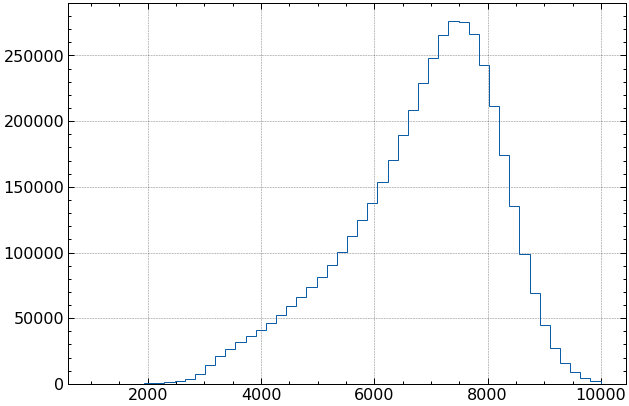

In [48]:
plt.figure(figsize=(10,7))
plt.hist(invM, histtype = 'step', bins = 50)
plt.show()

# 2) Missing Invariant Mass (MIM) 

In [49]:
def delP_sq(Eb, Emu, Pxm, Pym, Pzm):

    return np.abs(4*Eb**2 - 4*Eb*(Emu[:,0]+Emu[:,1]) + 2*(Emu[:,0]*Emu[:,1] - (Pxm[:,0]*Pxm[:,1] + Pym[:,0]*Pym[:,1] + Pzm[:,0]*Pzm[:,1])) + (Emu[:,0]**2 - (Pxm[:,0]**2 + Pym[:,0]**2 + Pzm[:,0]**2)) + (Emu[:,1]**2 - (Pxm[:,1]**2 + Pym[:,1]**2 + Pzm[:,1]**2)))


In [50]:
delp_sq2 = delP_sq(5000, Efm2, pxfm2, pyfm2, pzfm2) 

In [51]:
MIM2 = np.sqrt(delp_sq2)

In [52]:
df_results['MIM'] = MIM2

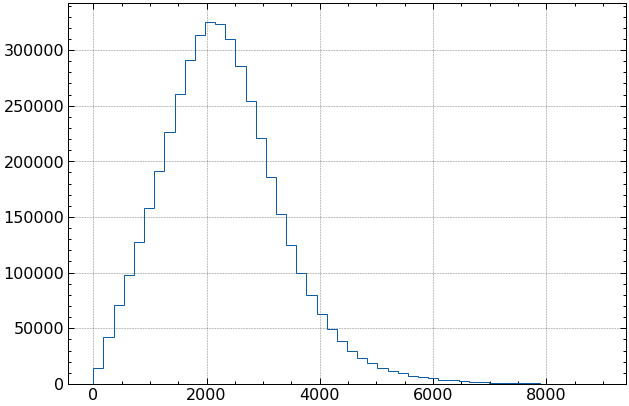

In [53]:
plt.figure(figsize=(10,7))
plt.hist(MIM2, histtype = 'step', bins = 50)
plt.show()

# 3) Eta_Distribution

In [54]:
fmeta2 = np.array(big_df5['fmeta'].tolist())
fmphi2 = np.array(big_df5['fmphi'].tolist())
fmpt2 = np.array(big_df5['fmpt'].tolist())

In [55]:
fmeta3 = big_df5['fmeta'].reset_index(drop=True)
df_results['fmeta'] = fmeta3

In [56]:
fmeta2

array([[ 2.79938316, -4.42407799],
       [-3.15975857,  3.12068629],
       [-4.10686207,  5.37239075],
       ...,
       [ 5.45660925, -3.83178496],
       [ 4.51189852, -5.52643013],
       [ 4.07700443, -4.52603388]])

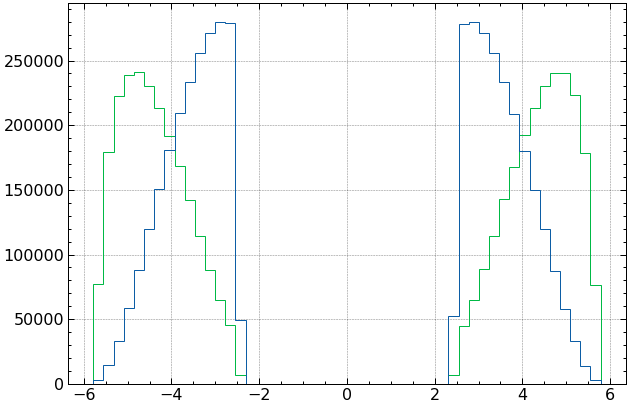

In [57]:
plt.figure(figsize=(10,7))
plt.hist(fmeta2, histtype = 'step', bins =50)
plt.show()

# 4) Delta_Eta

In [58]:
def deltaeta(eta):
    return np.abs((eta[:,0]) - (eta[:,1]))

In [59]:
deleta2 = deltaeta(fmeta2)

In [60]:
df_results['del_fmeta'] = deleta2

# Plotting

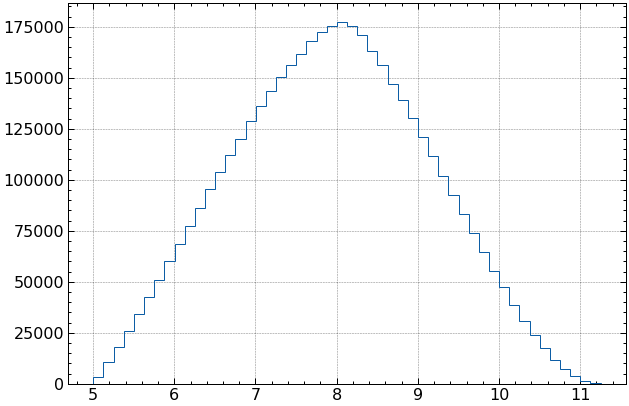

In [61]:
plt.figure(figsize=(10,7))
plt.hist(deleta2, histtype = 'step', bins =50)
plt.show()

# 5) Delta_PHI

In [62]:
# def delphi2(phi):
#     del_phi = np.abs(phi[:, 0] - phi[:, 1])
#     del_phi = np.minimum(del_phi, 2*np.pi - del_phi)
#     return del_phi

In [63]:
def delphi(phi):
    del_phi = np.abs(phi[:, 0] - phi[:, 1])
    del_phi = np.where(del_phi > np.pi, 2*np.pi - del_phi, del_phi)
    return del_phi

In [64]:
# def delphi(phi):
#     del_phi = phi[:, 0] - phi[:, 1]
#     del_phi = np.where(del_phi >= -np.pi, del_phi, del_phi + 2 * np.pi)
#     del_phi = np.where(del_phi <= np.pi, del_phi, del_phi - 2 * np.pi)
    
#     return del_phi

In [65]:
delphi2 = delphi(fmphi2)

In [66]:
df_results['del_phi'] = delphi2

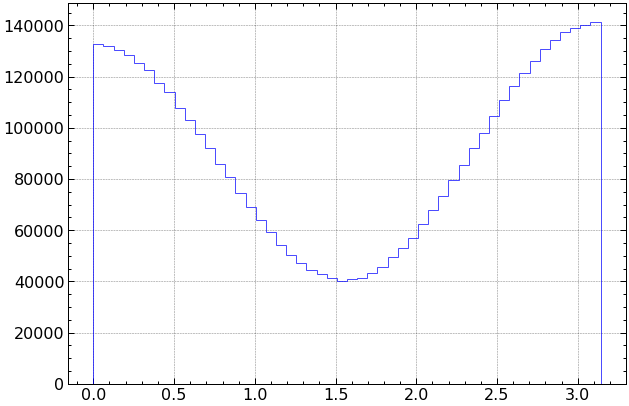

In [67]:
plt.figure(figsize=(10, 7))  
plt.hist(delphi2, bins=50, color='blue', alpha=0.7, histtype = 'step')
plt.show()

# 6) Delta_R

In [68]:
def delR(delPhi, delEta):
    return np.sqrt(delphi**2 + delEta**2)

In [69]:
delRfm = np.sqrt(delphi2**2 + deleta2**2)

In [70]:
df_results['delR_fm'] = delRfm

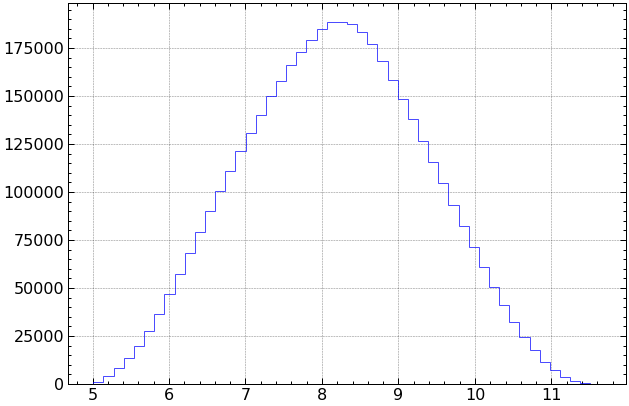

In [71]:
plt.figure(figsize=(10, 7))  
plt.hist(delRfm, bins=50, color='blue', alpha=0.7, histtype = 'step')
plt.show()

# 7) Energy of Forward Muons

In [72]:
Emin = np.min(Efm2, axis=1).reshape(-1,1)

In [73]:
Emax = np.max(Efm2, axis=1).reshape(-1,1)

In [74]:
totE = np.sum(Efm2, axis = 1).reshape(-1,1)

In [75]:
df_results['Emin_fm'] = Emin
df_results['Emax_fm'] = Emax
df_results['totE_fm'] = totE

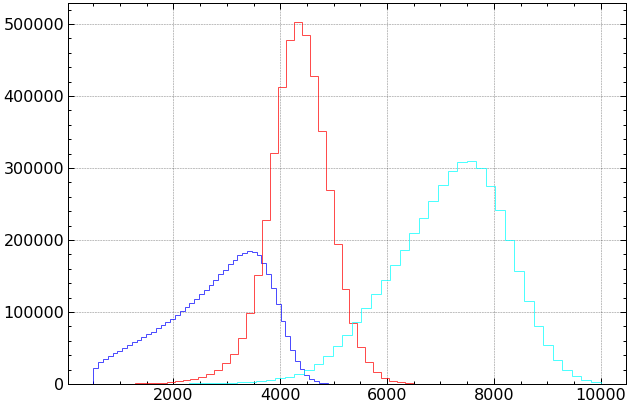

In [76]:
plt.figure(figsize=(10, 7))  
plt.hist(Emin, bins=50, color='blue', alpha=0.7, histtype = 'step')
plt.hist(Emax, bins=50, color='red', alpha=0.7, histtype = 'step')
plt.hist(totE, bins=50, color='cyan', alpha=0.7, histtype = 'step')
plt.show()

# 8) P_T of forward muons

In [77]:
def PTMu(px, py):
    return np.sqrt((px[:,0] + px[:,1])**2 +(py[:,0] + py[:,1])**2)

In [78]:
ptmu = PTMu(pxfm2, pyfm2)

In [79]:
df_results['PT_fm'] = ptmu

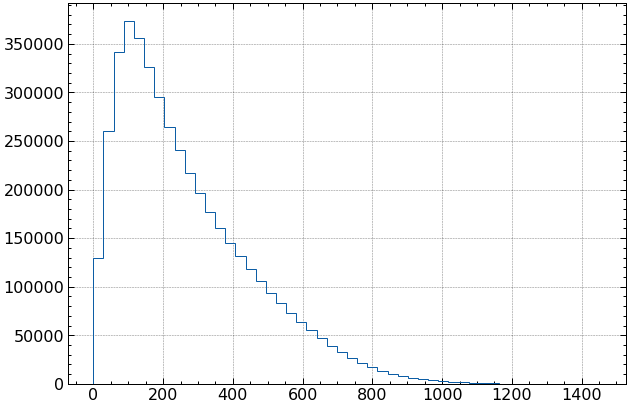

In [80]:
plt.figure(figsize=(10, 7))
plt.hist(ptmu, histtype = 'step', bins =50)
plt.show()

# 9) Missing Transverse Energy MET

In [81]:
pxj2 = big_df5['pxj'].tolist()
pyj2 = big_df5['pyj'].tolist()
pxe2 = big_df5['pxe'].tolist()
pye2 = big_df5['pye'].tolist()
pxm2 = big_df5['pxm'].tolist()
pym2 = big_df5['pym'].tolist()
pxp2 = big_df5['pxp'].tolist()
pyp2 = big_df5['pyp'].tolist()
pxfm3 = big_df5['pxfm'].tolist()
pyfm3 = big_df5['pyfm'].tolist()

In [82]:
tpx = ak.concatenate([pxj2, pxe2, pxm2, pxp2, pxfm2], axis=1)
tpy = ak.concatenate([pyj2, pye2, pym2, pyp2, pyfm2], axis=1)

In [83]:
sum_px = ak.sum(tpx, axis=1)
sum_py = ak.sum(tpy, axis=1)

In [84]:
MET = np.sqrt(sum_px**2 + sum_py**2)

In [85]:
df_results['MET'] = MET

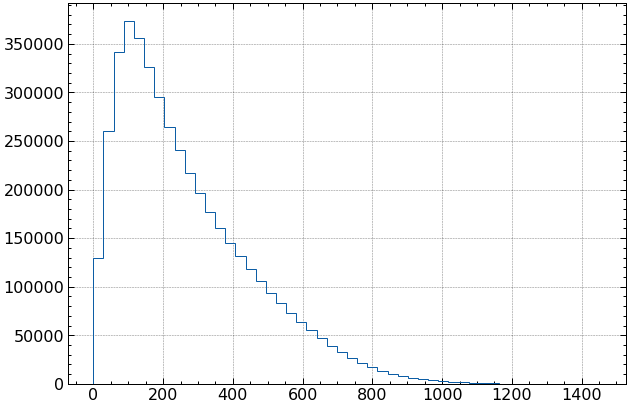

In [86]:
plt.figure(figsize=(10, 7))  
plt.hist(MET, bins=50, histtype ='step')
plt.show()

# Saving the data frames

In [87]:
df_results.to_pickle('/home/chandrima/IDM_MuC/Results_new/IDMsig_hphm_BP2_dist.pkl')

In [88]:
big_df5.to_pickle('/home/chandrima/IDM_MuC/Results_new/IDMsig_hphm_BP2_param.pkl')

In [89]:
t2 = time.time()
print((t2-t1)/60)

7.53864281574885


In [90]:
# # 4. No leptons and Jets in Central region (Missing Energy)
# big_df5 = big_df4[(big_df4['jet_num'] == 0) & (big_df4['e_num'] == 0) & (big_df4['m_num'] == 0)]
# len(big_df5)